# 1.Collect Initial Data

In [1]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# 1 Cotización

In [3]:
cot_all = pd.read_excel('..\\..\\Datos\\cotizaciones_all.xlsx')
cot_all.head()

,ID,Fecha Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Presencial,Remoto,Jefe Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
0,111502,2017-07-27 15:46:54,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Tecnico,NaN,NaN,NaN,0.0,NaN
1,111611,2017-07-29 13:37:05,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-02",No,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN
2,111629,2017-07-29 16:41:15,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-303,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Empleado,NaN,NaN,NaN,0.0,NaN
3,111766,2017-07-31 11:01:57,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",No,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario
4,111794,2017-07-31 15:52:32,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-604,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,4,Profesional,NaN,NaN,NaN,0.0,Constructor Civil


### 2.1.Data Description Single File: Cotizacion

In [4]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

## Categorical Exploration

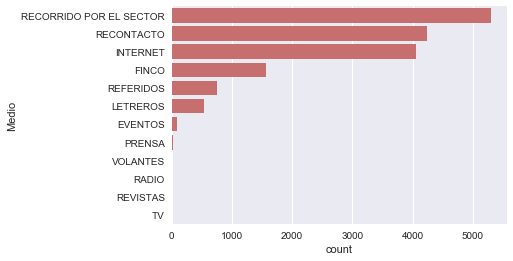

In [5]:
ver_atributo_categorico(cot_all,'Medio')

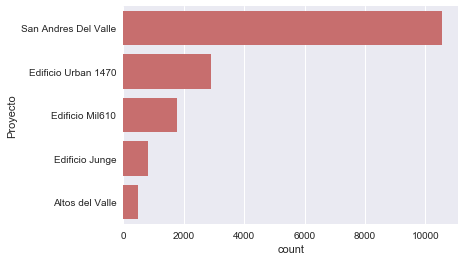

In [19]:
ver_atributo_categorico(cot_all,'Proyecto')

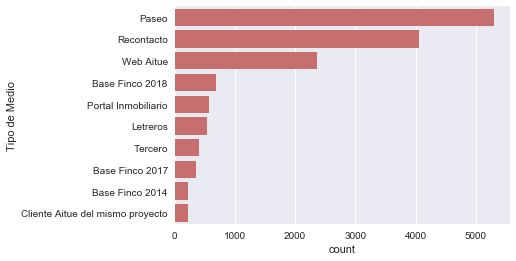

In [20]:
ver_atributo_categorico(cot_all,'Tipo de Medio',lim=10,limit=True)

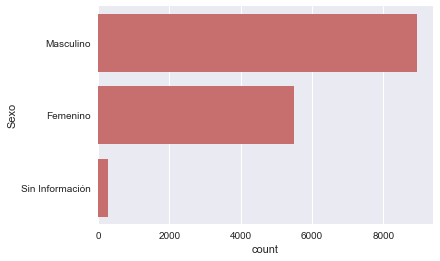

In [21]:
ver_atributo_categorico(cot_all,'Sexo')

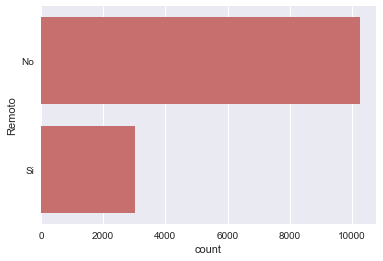

In [22]:
ver_atributo_categorico(cot_all,'Remoto')

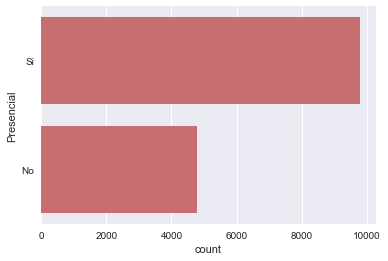

In [23]:
ver_atributo_categorico(cot_all,'Presencial')

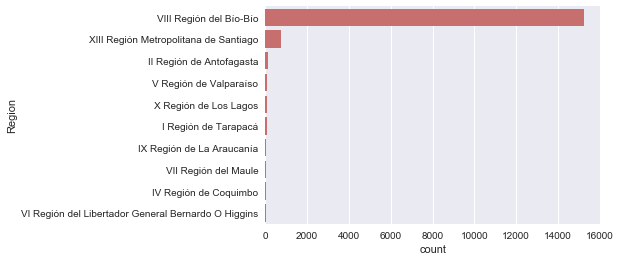

In [24]:
ver_atributo_categorico(cot_all,'Region',lim=10,limit=True)

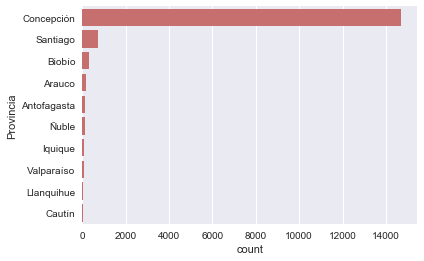

In [25]:
ver_atributo_categorico(cot_all,'Provincia',lim=10,limit=True)

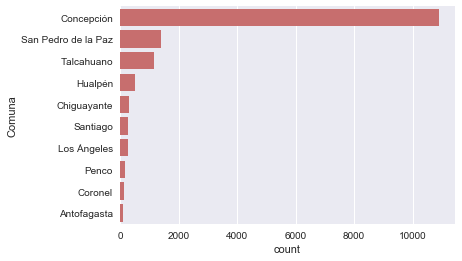

In [26]:
ver_atributo_categorico(cot_all,'Comuna',lim=10,limit=True)

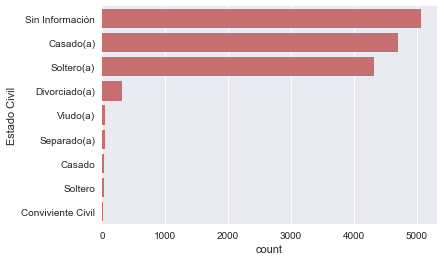

In [27]:
ver_atributo_categorico(cot_all,'Estado Civil')

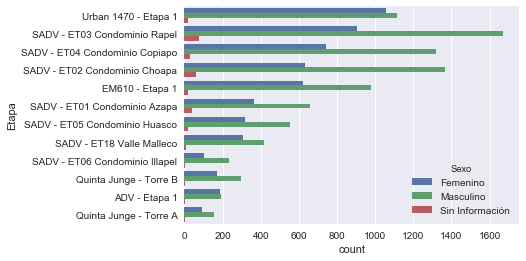

In [28]:
palette=["C0","C1","C2"]
ver_atributo_categorico(cot_all,'Etapa',hue='Sexo',palette=palette)

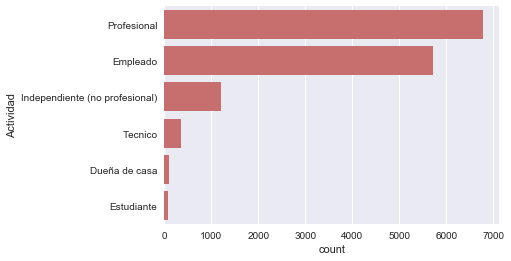

In [29]:
ver_atributo_categorico(cot_all,'Actividad')

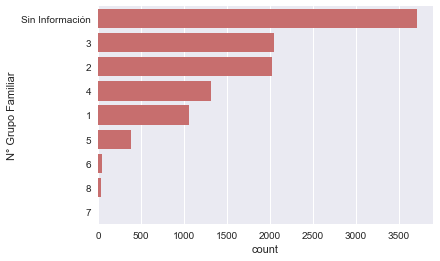

In [30]:
ver_atributo_categorico(cot_all,'N° Grupo Familiar')

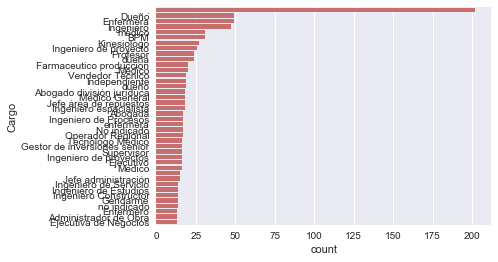

In [31]:
ver_atributo_categorico(cot_all,'Cargo',limit=True,lim=40)

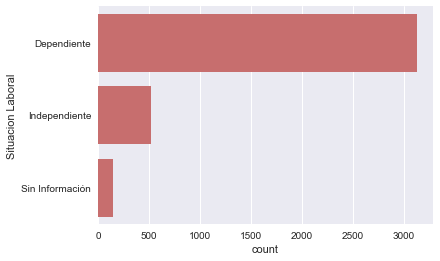

In [32]:
ver_atributo_categorico(cot_all,'Situacion Laboral')

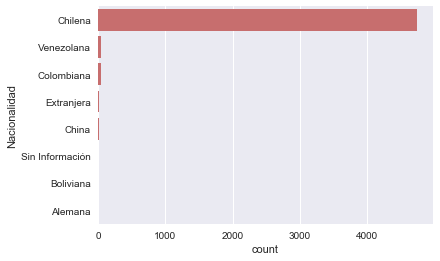

In [33]:
ver_atributo_categorico(cot_all,'Nacionalidad')

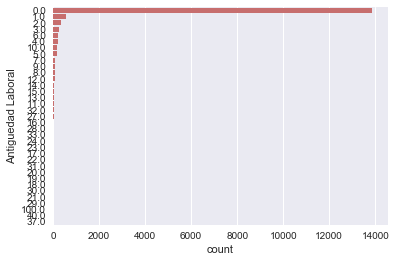

In [34]:
ver_atributo_categorico(cot_all,'Antiguedad Laboral')

510 [nan, 'a', 'Norteamericano / USS / UDD', 'Cesfam Lautaro Caceres', 'BioForest S.A.', 'DGAC', 'ACCIONA agua', 'Constructora Aitue \xa0\xa0\xa0', 'Arrigoni Ing.Y Const. S.A', 'Soc. Transportes Maritimo Service Ltda', 'Traumatologico', 'Besalco MD Montajes', 'Management Solutions Limitada', 'Forestal Celco', 'Caufmann', 'Inmobiliaria Los Pellines S.A.', 'MOP', '*', 'DFV Ingeniería y Gestión', 'Clinical Service', 'Hospital de Tomé', 'Municipalidad de Penco', 'Sanatorio Aleman \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Huachipato', 'Catim', 'CAP \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Municipalidad de Lota', 'Banco Estado', 'SVTI', 'Forestal papelera concepción', 'H&M Hennes & Mauritz SPA', '.', 'Chilena Consolidada seguros generales', 'Sociedad Educacional Juan Bosco LTDA', 'DAEM Hualpen', 'Ausenco Chile LTDA', 'HOSPITAL CLINICO DEL SUR SPA', 'Corporación Adventista \xa0\xa0\xa0\xa0\xa0\xa0\xa0', '\xa0\xa0

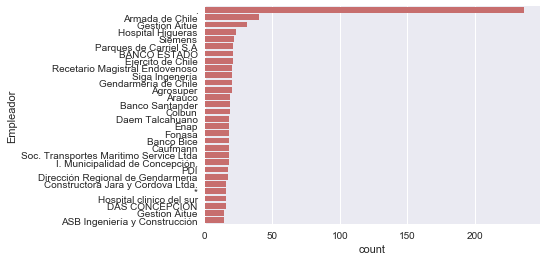

In [35]:
ver_atributo_categorico(cot_all,'Empleador',log=True, limit = True, lim=30)

130 [nan, 'Empresario', 'Constructor Civil', 'Traductor e Interprete', 'Matrona', 'Odontólogo', 'Profesor', 'Ingeniería en Biotecnología', 'Otro', 'Ingeniero Eléctrico', 'Técnico en Construcción', 'Fonoaudiólogo', 'Diseño Industrial', 'Mecánico Industrial', 'Empleado Público', 'Enfermería', 'Ingeniero en Administración', 'Contador Auditor', 'Ingeniero Comercial', 'Ingeniero en Construcción', 'Ingeniero', 'Empleado', 'Agronomo', 'Prevencionista de Riesgos', 'Ingeniero Civil Química', 'Administrador', 'Ingeniero Civil Industrial', 'Nutrición y Dietética', 'Tecnólogo Médico', 'Abogado', 'Médico', 'Educadora de Párvulos', 'Administrador Público', 'Periodista', 'Ingeniero de Ejecución', 'Psicólogo', 'Arquitecto', 'Ingeniero Civil Electrónico', 'Ingeniero en Prevención de Riesgo', 'Ingeniero Civil Eléctrico', 'Vendedor', 'Pastor', 'Administración de Empresas', 'Administrativo', 'Docente', 'Ingeniero Agronomo', 'Trabajo Social', 'Ingeniero Biomédica', 'Dueña De Casa', 'Ingeniero Civil en Info

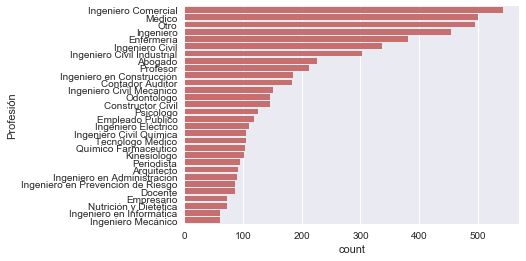

In [36]:
ver_atributo_categorico(cot_all,'Profesión',log=True, limit = True, lim=30)

3 ['Natural', 'Jurídico', nan]


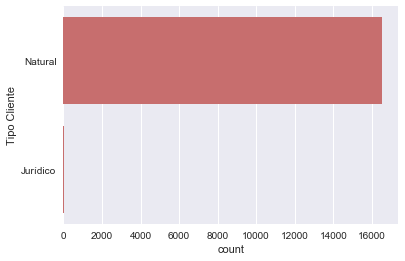

In [37]:
ver_atributo_categorico(cot_all,'Tipo Cliente',log=True, limit = True, lim=20)

In [41]:
#rows
df = cot_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  16592
Columnas:  41
Primer Registro:  2013-08-19 16:58:26
Ultimo Registro:  2018-05-22 13:42:53
Ruts Unicos:  6184


## Checking malformed values in attribute

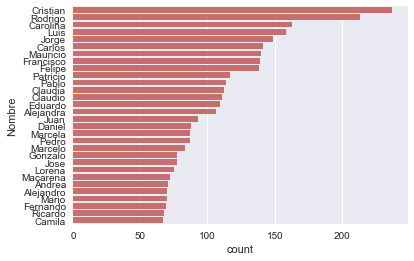

In [42]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Nombre', limit = True, lim=30)
f.savefig('img/nombre_check.png',bbox_inches='tight')

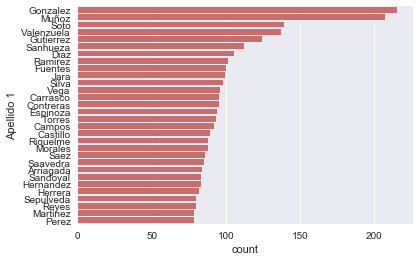

In [43]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 1', limit = True, lim=30)
f.savefig('img/apellido1_check.png',bbox_inches='tight')

1666 ['Ulloa', 'Torres', 'Manriquez', 'Martinez', 'Gajardo', 'l', '.', 'Campos', 'Fica', 'Pineda', 'Erle', 'Vega', 'Casanova', 'Villegas', 'Herrera', 'Rodriguez', 'Lopez', 'Oliva', 'Cabezas', 'Figueroa', 'Lobos', 'Sanchez', 'Becerra', 'Reyes', 'Miranda', 'Vergara', 'Marianjel', 'Acuña', '*', 'Paredes', 'Larenas', 'Seguek', 'Olivares', '-', 'Guzman', 'Molina', 'Opazo', 'Vilugrón', '..', 'Esparza', 'Vivanco', 'Silva', 'Brañas', 'Quiroga', 'Mora', 'Rojas', 'Nuñez', 'Lazo', 'Ortiz', 'Sandoval', 'Höger', 'Araya', 'Ramirez', 'Cadenas', 'Vera', 'Contreras', 'Hoffmann', 'Cartes', 'Mahuzier', 'Salaberri', 'Hernandez', 'Flores', 'Ilufin', 'Sorensen', 'Romero', 'Jara', 'Suazo', 'Orellana', 'Navarrete', 'Roman', 'Pinto', 'Cottet', 'Irribarra', 'Lecaros', nan, 'Mella', 'Arevalo', 'Aguilera', 'Rios', 'Bolados', 'Vallejos', 'Maldonado', 'Sanchéz', 'Neira', 'Castillo', 'carter', 'Bobadilla', 'Ortega', 'Avello', 'Carmona', 'Carvallo', 'Valenzuela', 'Revello', 'Adonis', 'Martínez', 'Cifuentes', 'Cabrera

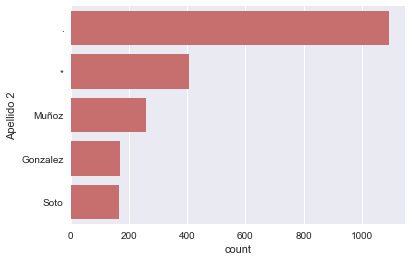

In [44]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 2',log=True, limit = True, lim=5)
f.savefig('img/apellido2_check.png',bbox_inches='tight')

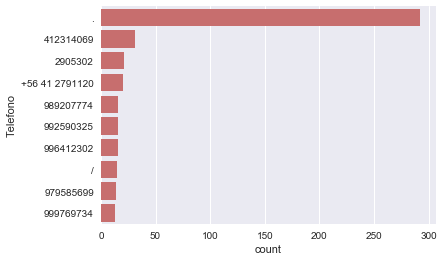

In [45]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Telefono', limit = True, lim=10)
f.savefig('img/telefono_check.png',bbox_inches='tight')

6038 [953748134, 76374699, 968441156, 2990590, 981372543, 90834457, 958295551, 995072841, 92449494, 942522023, 984192601, 98836621, 956181171, 85480235, 92493350, 968960554, 991280936, 988894560, 94007891, 956282212, 991299568, 988289650, 979575691, 95209394, 993118503, 88305206, 98873258, 95123765, 999684600, 962374072, 93206658, 98446361, 982314411, 987367733, 9981556548, 52080367, 76694924, 994698200, 981496410, 78995130, 950702404, 93090821, 2225841, 964427332, 994486955, 57568731, 981987470, 992953522, 97955039, 975361247, 74540483, 998279335, 987690273, 982085008, 77934502, 990938143, 998472754, 95990362, 974771402, 974878745, 950196206, 982347427, 964328618, 991390292, 961611186, 65991253, 98717377, 981385833, 942051491, 998847907, 942132618, 996412302, 956787113, '+56 9 61227693', 998950598, 99697471, 86651069, 982788710, 95395290, 82344634, 993443523, 89711239, 99999999, 99496404, '+56 9 75181074', 956675683, 990604760, 92749284, 968989297, 99356039, 98760877, 82995455, 981902

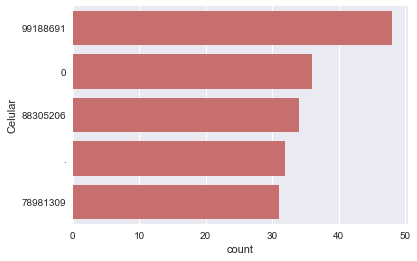

In [46]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Celular',log=True, limit = True, lim=5)
f.savefig('img/celular_check.png',bbox_inches='tight')

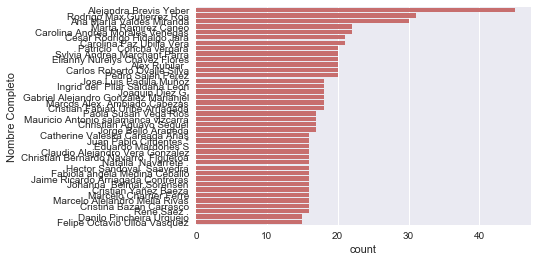

In [47]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Nombre Completo', limit = True, lim=40)
f.savefig('img/nombrecompleto_check.png',bbox_inches='tight')

# 3.Explore Data

### 3.1.Explore Data: Single File Cotizacion

In [48]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])


Cot rut promedio:  2.683053040103493
Cot rut desviacion:  2.6119688668842644
Cot por rut maximo:  45


### 2.4.Describe Data Combined Files: Negociacion

In [7]:
neg_all = pd.read_excel('..\\..\\Datos\\negocios_all.xlsx')
neg_all.head()

,ID,Fecha Cotizacion,ID Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Jefe Comercial,Ejecutivo Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
0,42212,2017-07-27 15:46:58.750,111502,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Alejandra Pooley Flores,Graciela Pareja Cancino,...,NaN,NaN,NaN,3,Tecnico,NaN,NaN,NaN,0.0,NaN
1,42242,2017-07-29 13:42:09.993,111611,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,TA-303,Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,NaN,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN
2,42263,2017-07-31 11:02:25.760,111766,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario
3,42379,2017-08-11 16:07:40.227,112677,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Bod-01,TA-301,Est-26",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,5,Profesional,Matrona,Dependiente,NaN,1.0,Matrona
4,42382,2017-08-11 16:13:46.600,112680,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Est-17,Est-18",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Profesional,Odontologo,Dependiente,Cesfam Lautaro Caceres,5.0,Odontólogo


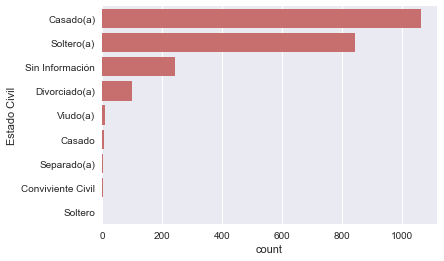

In [52]:
ver_atributo_categorico(neg_all,'Estado Civil')

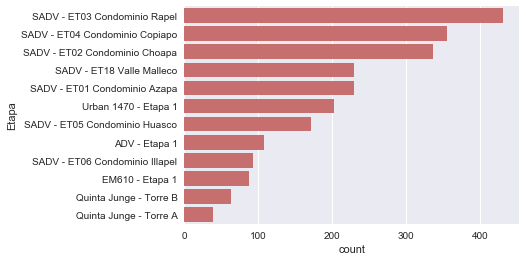

In [53]:
ver_atributo_categorico(neg_all,'Etapa')

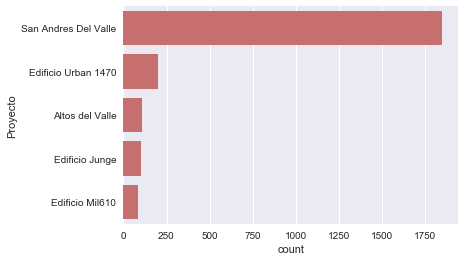

In [54]:
ver_atributo_categorico(neg_all,'Proyecto')

3 ['Normal', 'Desistimiento', 'Resciliacion']


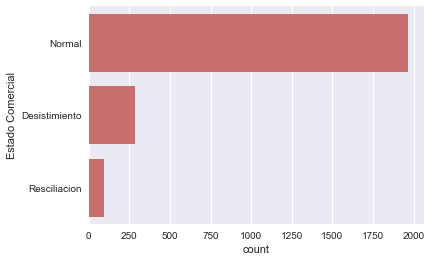

In [55]:
ver_atributo_categorico(neg_all,'Estado Comercial',log=True)

5 ['Anulada', 'Promesado', 'Reservado', 'Escriturado', 'Entregado']


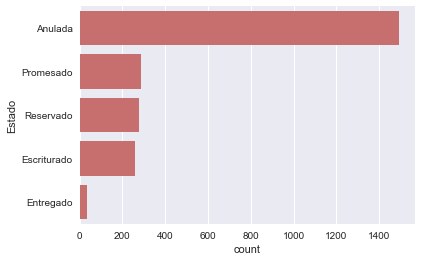

In [56]:
ver_atributo_categorico(neg_all,'Estado',log=True)

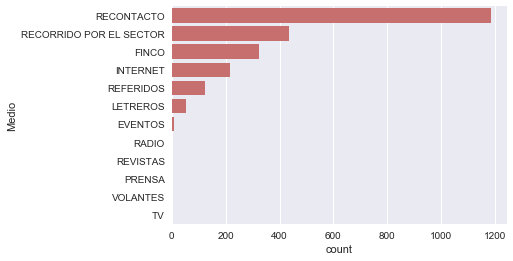

In [57]:
ver_atributo_categorico(neg_all,'Medio')

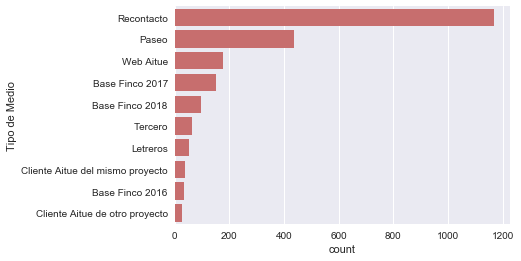

In [58]:
ver_atributo_categorico(neg_all,'Tipo de Medio',limit=True,lim=10)

In [59]:
#rows
df = neg_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  2347
Columnas:  49
Primer Registro:  2013-08-19 18:35:56.620000
Ultimo Registro:  2018-05-21 17:12:31.210000
Ruts Unicos:  1103


### 3.2.Data Exploration: Negocios

In [60]:
print("Neg rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Neg rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Neg por rut maximo: ",get_col_group_description(df,'RUT')['max'])
print("Neg estado anulados: ",len(df[df['Estado'] == 'Anulada'])/neg_all.shape[0])
print("Neg estado promesa: ",len(df[df['Estado'] == 'Promesado'])/neg_all.shape[0])
print("Neg estado reservado: ",len(df[df['Estado'] == 'Reservado'])/neg_all.shape[0])
print("Neg estado comercial desistimiento: ",len(df[df['Estado Comercial'] == 'Desistimiento'])/neg_all.shape[0])
print("Neg estado comercial normal: ",len(df[df['Estado Comercial'] == 'Normal'])/neg_all.shape[0])

Neg rut promedio:  2.127833182230281
Neg rut desviacion:  1.7149326870075374
Neg por rut maximo:  17
Neg estado anulados:  0.6352790796761824
Neg estado promesa:  0.12228376651043886
Neg estado reservado:  0.11844908393694077
Neg estado comercial desistimiento:  0.12270984235193864
Neg estado comercial normal:  0.8363868768640818


In [61]:
#columns droped 'Fecha Promesa', 'Telefono', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 
# 'Resciliacion por Modificacion', 'Motivo Desis/Resc', 'Description Desis/Resc'

#columnas no importantes para el sgte paso
unimportant_columns = ['Apellido 1','Apellido 2','Celular','Ejecutivo Comercial','Region','Provincia','Jefe Comercial','ID']
to_select_cols = df.count().sort_values(ascending=True).index.tolist()
to_select_cols = to_select_cols[8:]
to_select_cols = [item for item in to_select_cols if item not in unimportant_columns]
# to_select_cols

### 3.3.Exploracion de los ruts 

In [62]:
## Clientes en Negocios que no estan en Cotizaciones

cot_rut = cot_all['RUT'].unique().tolist()
neg_rut = neg_all['RUT'].unique().tolist()

not_in = [item for item in neg_rut if item not in cot_rut]
print("Clientes en neg que no esta en cot: ",not_in)

## Clientes en Cotizaciones que no estan en Negocios
not_in = [item for item in cot_rut if item not in neg_rut]
print("Clientes en cot que no estan en neg ",len(not_in))

# verificacion si los numeros encajan
print("cantidad de ruts unicos en cot: ",len(cot_rut))
print("cantidad de ruts unicos en neg: ",len(neg_rut))
print("total de ruts unicos en cot: neg_ruts_unicos + cot_not_in_neg = ",len(not_in) +len(neg_rut))

Clientes en neg que no esta en cot:  ['15671306-6']
Clientes en cot que no estan en neg  5082
cantidad de ruts unicos en cot:  6184
cantidad de ruts unicos en neg:  1103
total de ruts unicos en cot: neg_ruts_unicos + cot_not_in_neg =  6185


### 3.4.Exploracion de ID y ID COTIZACION 

In [63]:
# hay 7 id_negocio que tienen mas de un id_cotizacion
print("Filas :",neg_all['ID Cotizacion'].shape[0])
print("ID Cot unicos ",len(neg_all['ID Cotizacion'].unique()))

Filas : 2347
ID Cot unicos  2340


In [64]:
# que filas en negocios correspondern a los 7 ruts que tienen mas de 1 negocio
neg_id_cot_count = neg_all.groupby('ID Cotizacion').count().sort_values(by='ID',ascending=False)
neg_multiples_id = neg_id_cot_count[neg_id_cot_count['ID'] >= 2]

neg_id_rep = neg_multiples_id['ID'].index.tolist()

# view = neg_all.loc[neg_all['ID Cotizacion']==multiple_rows[1]]
view = neg_all.loc[neg_all['ID Cotizacion'].isin(neg_id_rep)]
view.loc[:,to_select_cols]
# df.loc[df['column_name'].isin(some_values)]

,Telefono,Fecha Promesa,Cargo,Empleador,Situacion Laboral,Fecha Nacimiento,Nacionalidad,Profesión,Direccion,N° Grupo Familiar,...,Tipo de Medio,Proyecto,Etapa,Total Productos,Estado,Correo Electronico,Comuna,Estado Comercial,RUT,Nombre
85,NaN,NaT,NaN,NaN,Independiente,1967-01-20,Chilena,Profesor,Camino Al Venado 585,Sin Información,...,Recontacto,Altos del Valle,ADV - Etapa 1,6040.0,Anulada,lulapolidori@gmail.com / galcazar@molicop.cl,San Pedro de la Paz,Normal,9879501-4,Maria de la Luz
88,NaN,2018-02-22,NaN,NaN,Independiente,1967-01-20,Chilena,Profesor,Camino Al Venado 585,Sin Información,...,Recontacto,Altos del Valle,ADV - Etapa 1,6040.0,Promesado,lulapolidori@gmail.com / galcazar@molicop.cl,San Pedro de la Paz,Normal,9879501-4,Maria de la Luz
4,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Anulada,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
5,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Anulada,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
6,NaN,2016-02-12,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Escriturado,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
13,982297510,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Vilumanque,NaN,...,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,5447.0,Anulada,subgerenteassuan.cl,Concepción,Normal,16766381-8,Cristian Jesus
14,982297510,2016-08-31,NaN,NaN,NaN,NaT,NaN,NaN,Vilumanque,NaN,...,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,5447.0,Promesado,subgerenteassuan.cl,Concepción,Resciliacion,16766381-8,Cristian Jesus
125,78442661,NaT,Dueño,NaN,NaN,1985-10-04,NaN,NaN,av. Los Presidentes 1533 Depto casa 5,Sin Información,...,Paseo,San Andres Del Valle,SADV - ET02 Condominio Choapa,3835.0,Anulada,claudiogajardo_s@hotmail.com,Concepción,Normal,16138640-5,Claudio Alberto
135,NaN,2014-04-30,Ejecutivo,Banco Bice,Dependiente,1979-08-19,Chilena,NaN,Ramón Carrasco 239 Depto 264,3,...,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,3532.0,Anulada,mbarra@bice.cl,Concepción,Normal,13628528-9,Mario Marcel
142,NaN,2014-04-30,Ejecutivo,Banco Bice,Dependiente,1979-08-19,Chilena,NaN,Ramón Carrasco 239 Depto 264,3,...,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,3532.0,Promesado,mbarra@bice.cl,Concepción,Resciliacion,13628528-9,Mario Marcel
